# Class Name



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn import metrics

CSV_PATH = r"./transactions.csv"
df = pd.read_csv(CSV_PATH)

# Agency_0: 0
# Agency_1: 2,3,5
# Agency_2: 1,4

# Task 1

In [2]:
# Task 1
agt = df['AgentId'].value_counts()

sum_agc = [agt[0],agt[2]+agt[3]+agt[5],agt[1]+agt[4]]

Agency = {'Agency Name':["Other","Your Estate","Lovely Housing"],\
        'Numbers':[sum_agc[0],sum_agc[1],sum_agc[2]]}

res_1 = pd.DataFrame(Agency)
res_1.sort_values("Numbers", ascending=False)

,Agency Name,Numbers
1,Your Estate,225
2,Lovely Housing,150
0,Other,39


# Task2

In [3]:
# Task 2
df_2= df[['AgentId', 'Y house price of unit area']]
mean = []
for i in range(6):
    mean.append(df_2[df_2['AgentId'] == i]['Y house price of unit area'].mean())

# round mean price
for i in range(len(mean)):
    mean[i] = round(mean[i], 1)

Agent={'AgentId':[i for i in range(6)], \
    'Mean Price':mean}
res_2 = pd.DataFrame(Agent)
res_2.sort_values('Mean Price', ascending=False)

,AgentId,Mean Price
5,5,41.8
1,1,38.7
4,4,38.2
3,3,38.0
2,2,36.2
0,0,35.9


# Task 3

In [4]:
# Task 3
df_3 = df[['AgentId','X1 transaction date','Y house price of unit area']]

# Add 2 columns:'Year' and 'AgencyId'
df_3['Year'] = 1; df_3['AgencyId'] = 1

for i in range(len(df_3)):
    df_3.loc[i, 'Year'] = int(df_3.loc[i, 'X1 transaction date'])
    agtId = df_3.loc[i, 'AgentId']
    if agtId == 0:
        df_3.loc[i, 'AgencyId'] = 0
    if agtId == 2 or agtId == 3 or agtId == 5:
        df_3.loc[i, 'AgencyId'] = 1
    if agtId == 1 or agtId == 4:
        df_3.loc[i, 'AgencyId'] = 2
    
df_3 = df_3.drop(['AgentId','X1 transaction date'], axis=1)

mean_i = dict()
for i in [2012, 2013]:
    df_3_i = df_3[df_3['Year'] == i]
    # one year's Y_area
    mean_i[i] = round( df_3_i['Y house price of unit area'].sum()/len(df_3_i), 1 )

    if i == 2012:
        flag = 0
    else: flag = 3

    for i in [0,1,2]:
        mean_i[flag + i] = round(df_3_i[df_3_i['AgencyId'] == i]['Y house price of unit area'].sum() / df_3_i['AgencyId'].value_counts()[i], 1)

table_vals={"Year Mean Price": [mean_i[2012], mean_i[2013]], \
            "Agency_0": [mean_i[0], mean_i[3]], \
            "Agency_1": [mean_i[1], mean_i[4]], \
            "Agency_2": [mean_i[2], mean_i[5]]}

res_3 = pd.DataFrame(table_vals)
res_3.index = ['2012', '2013']
res_3

,Year Mean Price,Agency_0,Agency_1,Agency_2
2012,36.3,32.2,35.7,38.2
2013,38.7,37.4,39.1,38.5


# Task 4

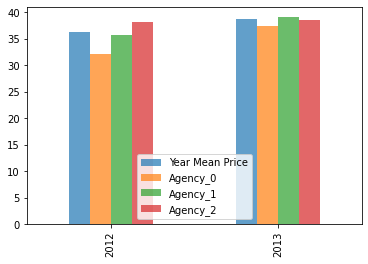

In [5]:
# Task 4
res_3.plot(kind='bar', alpha=0.7)

# Task 5

In [6]:
# Task 5
df_5 = df
corr_matrix = df_5.corr()
corr_matrix['Y house price of unit area'].sort_values()

X3 distance to the nearest MRT station   -0.673613
X2 house age                             -0.210567
AgentId                                   0.077259
X1 transaction date                       0.087491
X6 longitude                              0.523287
X5 latitude                               0.546307
X4 number of convenience stores           0.571005
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

## From this result, we choose X2,X3,X4,X5,X6 as X

In [9]:
# split sets
from sklearn.model_selection import train_test_split

df_5 = df.drop(['AgentId', 'X1 transaction date'], axis=1)

data_x = df_5.drop('Y house price of unit area', axis=1)
data_y = df_5[['Y house price of unit area']]
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

# Task 6

In [10]:
# Task 6
# Linear Regeression
LR_reg = linear_model.LinearRegression()
LR_reg.fit(train_x, train_y)
print("LR:{}\n".format(LR_reg.coef_, LR_reg.intercept_))

# Test
preds = LR_reg.predict(test_x)
mse = metrics.mean_squared_error(test_y, preds)
mae = metrics.mean_absolute_error(test_y, preds)
mape = np.mean(np.abs((preds-test_y)/test_y))*100
print("mse: {}, \n\nmae: {}, \n\nmape: {}".format(mse, mae, mape))

LR:[[-2.98732665e-01 -4.11838665e-03  1.18684001e+00  2.31055476e+02
   4.38665018e+00]]

mse: 52.251476498011414, 

mae: 5.6524867034804345, 

mape: Y house price of unit area    16.081239
dtype: float64


# Task 7

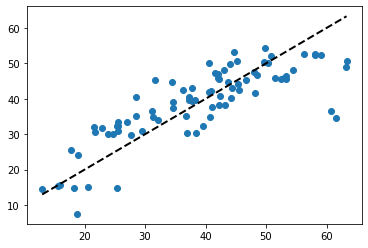

In [11]:
# Task 7
plot.figure('model')
plot.plot(test_y, preds, '.')
plot.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw =2)
plot.scatter(test_y, preds)
plot.show()

The coordinate of Blue point in this figures is (test_y, preds)

## Q1: Is your model overfitting? 

Most points of the figures aren't in the black line, which means preds set doesn't describe test_y set perfectly. In that case, this model isn't overfitting.

## Q2: Is your model underfitting?

Most points are near the black line, except several points far away from this line. From this point, this model is underfitting.
